# Machine Learning

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
%matplotlib inline

## Loading Data

In [4]:
ecg_data = pd.read_csv("./processed_data/ecg_data.csv", index_col=0)

In [5]:
ecg_data.head()

,Segment Start,Segment End,xs0,xs1,xs2,xs3,xs4,xs5,xs6,xs7,...,xs193,xs194,xs195,xs196,xs197,xs198,xs199,Annotation Class,Annotation Class Numeric,acn
0,1284,1484,-0.058556,-0.058059,-0.057155,-0.055940,-0.054796,-0.054158,-0.054142,-0.054503,...,0.137641,0.140489,0.142698,0.144437,0.145646,0.146243,0.146136,N,1,0
1,605479,605679,0.049140,0.048014,0.045255,0.041231,0.036522,0.031692,0.027114,0.022902,...,-0.053165,-0.055104,-0.056937,-0.058567,-0.060173,-0.062033,-0.064229,L,4,3
2,21845,22045,0.059978,0.058579,0.056865,0.055295,0.053764,0.051974,0.049704,0.046862,...,-0.062430,-0.063122,-0.064830,-0.067566,-0.070728,-0.073325,-0.074336,N,1,0
3,324166,324366,-0.075383,-0.076869,-0.079413,-0.083536,-0.088039,-0.090900,-0.090414,-0.086158,...,-0.040858,-0.040343,-0.041029,-0.043588,-0.048406,-0.055377,-0.063800,N,1,0
4,127439,127639,-0.017049,-0.019908,-0.022371,-0.023693,-0.023386,-0.021627,-0.018949,-0.015967,...,0.009679,0.003653,-0.000938,-0.003769,-0.004935,-0.004898,-0.004357,N,1,0


In [6]:
ecg_data["Annotation Class"].unique()

array(['N', 'L', 'V', 'R', '/'], dtype=object)

In [7]:
ecg_data["Annotation Class"].nunique()

5

In [8]:
ecg_data["Annotation Class"].value_counts()

Annotation Class
N    73439
L     8068
R     7255
V     6793
/     3619
Name: count, dtype: int64

## Preprocessing

### Converting Non Numeric Column to Numeric discontinuous Columns

In [9]:
annotation_dict = dict()
for i, symbol in enumerate(ecg_data["Annotation Class"].unique()):
    annotation_dict[symbol] = i + 1
ecg_data["Annotation Class Numeric"] = ecg_data["Annotation Class"].apply(
    lambda x: annotation_dict[x]
)

In [10]:
ecg_data.head()

,Segment Start,Segment End,xs0,xs1,xs2,xs3,xs4,xs5,xs6,xs7,...,xs193,xs194,xs195,xs196,xs197,xs198,xs199,Annotation Class,Annotation Class Numeric,acn
0,1284,1484,-0.058556,-0.058059,-0.057155,-0.055940,-0.054796,-0.054158,-0.054142,-0.054503,...,0.137641,0.140489,0.142698,0.144437,0.145646,0.146243,0.146136,N,1,0
1,605479,605679,0.049140,0.048014,0.045255,0.041231,0.036522,0.031692,0.027114,0.022902,...,-0.053165,-0.055104,-0.056937,-0.058567,-0.060173,-0.062033,-0.064229,L,2,3
2,21845,22045,0.059978,0.058579,0.056865,0.055295,0.053764,0.051974,0.049704,0.046862,...,-0.062430,-0.063122,-0.064830,-0.067566,-0.070728,-0.073325,-0.074336,N,1,0
3,324166,324366,-0.075383,-0.076869,-0.079413,-0.083536,-0.088039,-0.090900,-0.090414,-0.086158,...,-0.040858,-0.040343,-0.041029,-0.043588,-0.048406,-0.055377,-0.063800,N,1,0
4,127439,127639,-0.017049,-0.019908,-0.022371,-0.023693,-0.023386,-0.021627,-0.018949,-0.015967,...,0.009679,0.003653,-0.000938,-0.003769,-0.004935,-0.004898,-0.004357,N,1,0


## What each Annotation looks like?

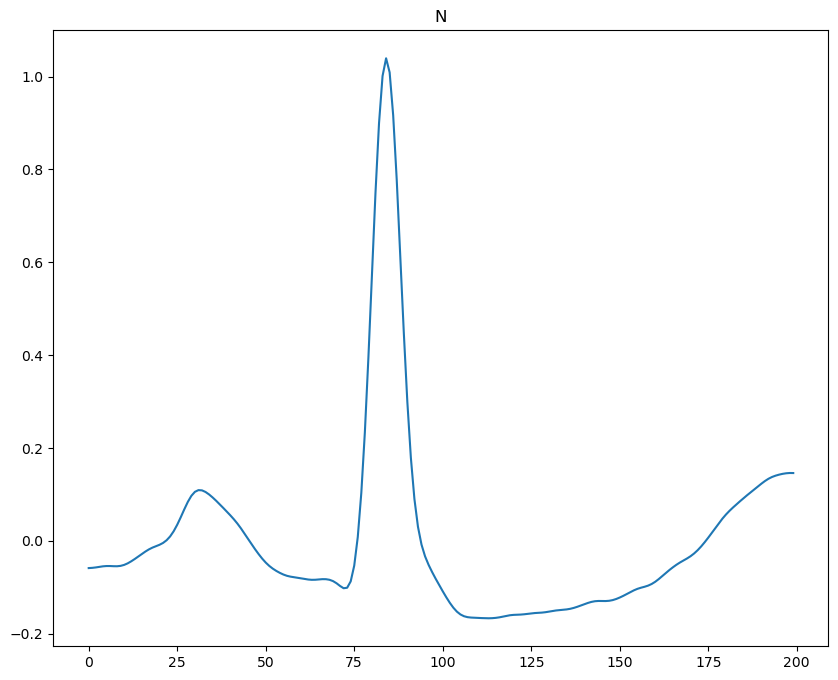

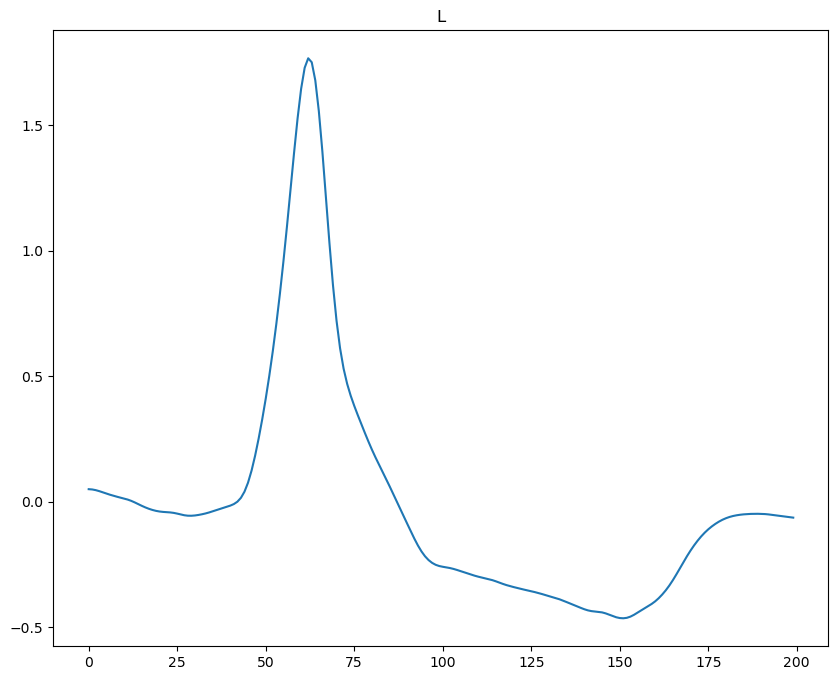

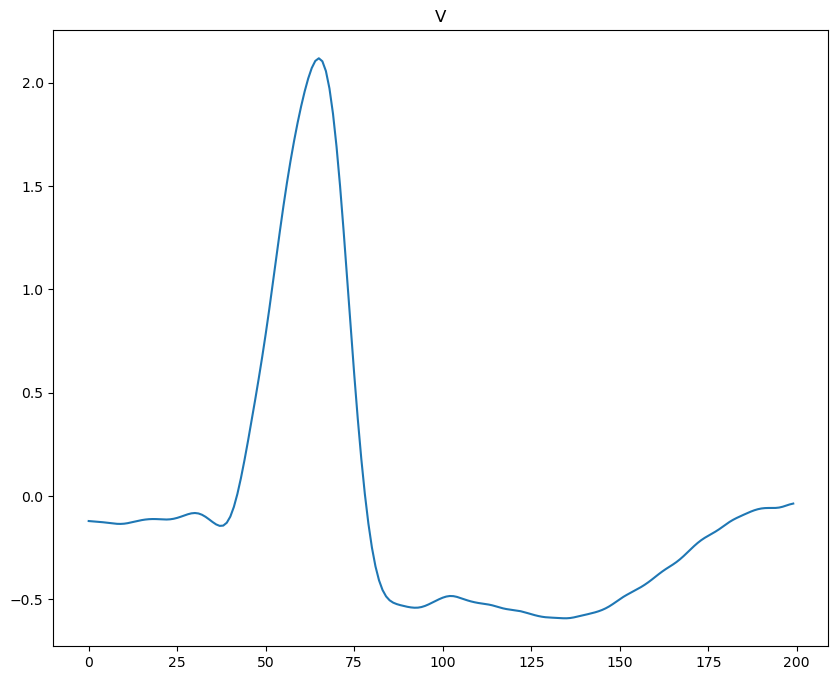

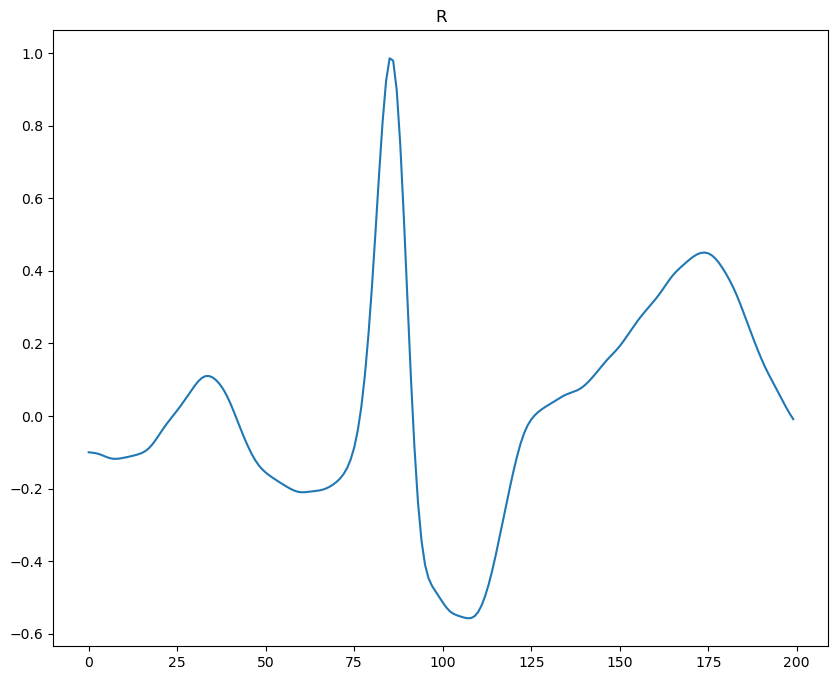

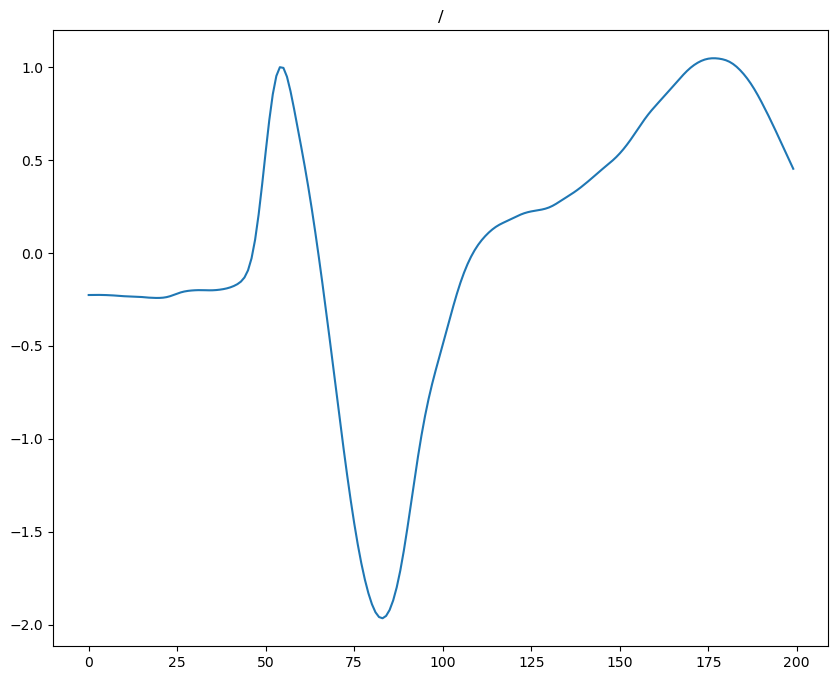

In [11]:
x_columns = [f'xs{i}' for i in range(200)]

for symbol in ecg_data["Annotation Class"].unique():
    readings = (
        ecg_data[ecg_data["Annotation Class"] == symbol].head(1)[x_columns].values[0]
    )
    plt.figure(figsize=(10, 8))
    plt.title(label=symbol)
    plt.plot(readings)
    plt.show()


## Splitting into Test and Train Data

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [13]:
X = ecg_data[x_columns].values

In [14]:
y = ecg_data["Annotation Class Numeric"].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True
)
X_train_1, X_val, y_train_1, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, shuffle=True, random_state=42
)

In [17]:
X_train.shape

(79339, 200)

In [18]:
y_train.shape

(79339,)

In [19]:
X_test.shape

(19835, 200)

In [20]:
y_test.shape

(19835,)

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [22]:
lr_params = {"multi_class": ["ovr", "multinomial", "auto"]}

In [23]:
pipeline = Pipeline([
    ("scaler", MinMaxScaler()),  # Add a scaler step
    ("lr", GridSearchCV(LogisticRegression(max_iter=1000), lr_params, verbose=3)),
])


In [24]:
pipeline.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...................multi_class=ovr;, score=0.846 total time=  31.9s
[CV 2/5] END ...................multi_class=ovr;, score=0.846 total time=  40.9s
[CV 3/5] END ...................multi_class=ovr;, score=0.846 total time=  36.5s
[CV 4/5] END ...................multi_class=ovr;, score=0.847 total time=  40.4s
[CV 5/5] END ...................multi_class=ovr;, score=0.845 total time=  34.6s


c:\Users\disle\miniconda3\envs\base_ds\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...........multi_class=multinomial;, score=0.860 total time=  36.5s


c:\Users\disle\miniconda3\envs\base_ds\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ...........multi_class=multinomial;, score=0.860 total time=  34.1s


c:\Users\disle\miniconda3\envs\base_ds\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ...........multi_class=multinomial;, score=0.863 total time=  35.4s


c:\Users\disle\miniconda3\envs\base_ds\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ...........multi_class=multinomial;, score=0.865 total time=  36.6s


c:\Users\disle\miniconda3\envs\base_ds\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ...........multi_class=multinomial;, score=0.862 total time=  51.8s


c:\Users\disle\miniconda3\envs\base_ds\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ..................multi_class=auto;, score=0.860 total time=  46.7s


c:\Users\disle\miniconda3\envs\base_ds\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ..................multi_class=auto;, score=0.860 total time=  45.7s


c:\Users\disle\miniconda3\envs\base_ds\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ..................multi_class=auto;, score=0.863 total time=  44.9s


c:\Users\disle\miniconda3\envs\base_ds\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ..................multi_class=auto;, score=0.865 total time=  46.4s


c:\Users\disle\miniconda3\envs\base_ds\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ..................multi_class=auto;, score=0.862 total time=  47.6s


c:\Users\disle\miniconda3\envs\base_ds\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('lr',
                 GridSearchCV(estimator=LogisticRegression(max_iter=1000),
                              param_grid={'multi_class': ['ovr', 'multinomial',
                                                          'auto']},
                              verbose=3))])

In [25]:
pred = pipeline.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [27]:
print(confusion_matrix(y_test, pred))

[[14439   112    91    37     9]
 [  828   736    49     1     0]
 [  608   105   544    86    15]
 [  697    34    16   704     0]
 [    1    23     6     0   694]]


In [28]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.87      0.98      0.92     14688
           2       0.73      0.46      0.56      1614
           3       0.77      0.40      0.53      1358
           4       0.85      0.49      0.62      1451
           5       0.97      0.96      0.96       724

    accuracy                           0.86     19835
   macro avg       0.84      0.66      0.72     19835
weighted avg       0.85      0.86      0.85     19835



## KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
error_rate = []
for i in range(1, 5000, 500):
    knn = Pipeline(
        [("minmax", MinMaxScaler()), ("knn", KNeighborsClassifier(n_neighbors=i))]
    )
    knn.fit(X_train_1, y_train_1)
    pred_i = knn.predict(X_val)
    print(f"Neighbours {i}")
    print(f"Loss: {np.mean(pred_i !=y_val)}")
    # Take the mean where prediction is not equal to actual
    error_rate.append(np.mean(pred_i != y_val))

Neighbours 1
Loss: 0.004474413914797076
Neighbours 501
Loss: 0.053440887320393246
Neighbours 1001
Loss: 0.08690446180993194
Neighbours 1501
Loss: 0.11948575749936981
Neighbours 2001
Loss: 0.15011343584572726
Neighbours 2501
Loss: 0.18704310562137635
Neighbours 3001
Loss: 0.21036047390975549
Neighbours 3501
Loss: 0.2179858835391984
Neighbours 4001
Loss: 0.2230274766826317
Neighbours 4501
Loss: 0.22825812956894379


Text(0, 0.5, 'Error Rate')

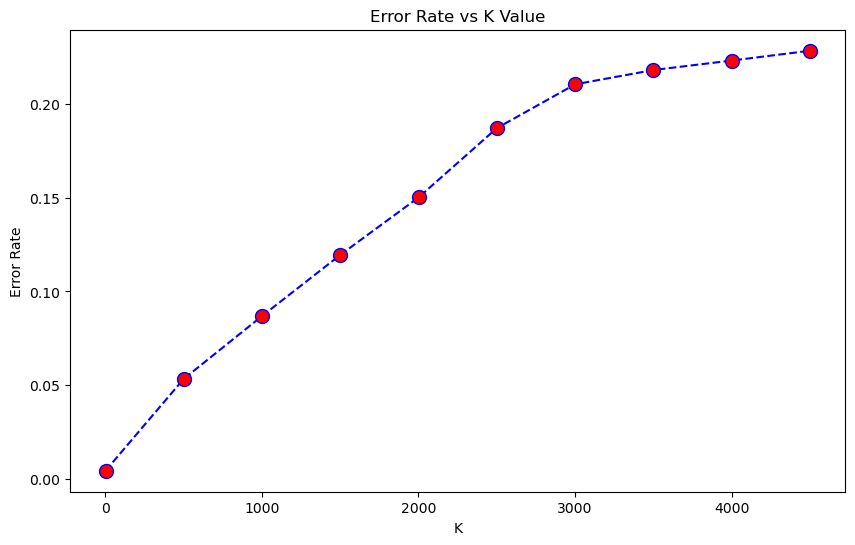

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, 5000, 500),
    error_rate,
    color="blue",
    linestyle="dashed",
    marker="o",
    markerfacecolor="red",
    markersize=10,
)
plt.title("Error Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [32]:
knn = Pipeline(
    [("minmax", MinMaxScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]
)
knn.fit(X_train_1, y_train_1)

Pipeline(steps=[('minmax', MinMaxScaler()), ('knn', KNeighborsClassifier())])

In [33]:
pred = knn.predict(X_test)

In [34]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     14688
           2       0.99      0.99      0.99      1614
           3       0.98      0.96      0.97      1358
           4       0.99      1.00      0.99      1451
           5       1.00      1.00      1.00       724

    accuracy                           0.99     19835
   macro avg       0.99      0.99      0.99     19835
weighted avg       0.99      0.99      0.99     19835



In [35]:
print(confusion_matrix(y_test, pred))

[[14652     9    21     6     0]
 [    6  1605     2     1     0]
 [   43     9  1305     1     0]
 [    7     0     0  1444     0]
 [    1     0     0     0   723]]


In [36]:
print(accuracy_score(y_test, pred))

0.9946559112679607


## Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt_params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
}
dt = Pipeline(
    [
        ("minmax", MinMaxScaler()),
        ("Bayes", GridSearchCV(DecisionTreeClassifier(), dt_params, verbose=3)),
    ]
)

In [39]:
dt.fit(X_train_1, y_train_1)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .....criterion=gini, splitter=best;, score=0.979 total time= 5.3min
[CV 2/5] END .....criterion=gini, splitter=best;, score=0.979 total time= 4.8min
[CV 3/5] END .....criterion=gini, splitter=best;, score=0.977 total time= 3.8min
[CV 4/5] END .....criterion=gini, splitter=best;, score=0.976 total time= 4.3min
[CV 5/5] END .....criterion=gini, splitter=best;, score=0.977 total time= 3.9min
[CV 1/5] END ...criterion=gini, splitter=random;, score=0.981 total time=  13.9s
[CV 2/5] END ...criterion=gini, splitter=random;, score=0.983 total time=  11.0s
[CV 3/5] END ...criterion=gini, splitter=random;, score=0.981 total time=  14.3s
[CV 4/5] END ...criterion=gini, splitter=random;, score=0.980 total time=  13.3s
[CV 5/5] END ...criterion=gini, splitter=random;, score=0.982 total time=  15.1s
[CV 1/5] END ..criterion=entropy, splitter=best;, score=0.984 total time= 2.9min
[CV 2/5] END ..criterion=entropy, splitter=best;,

Pipeline(steps=[('minmax', MinMaxScaler()),
                ('Bayes',
                 GridSearchCV(estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy',
                                                        'log_loss'],
                                          'splitter': ['best', 'random']},
                              verbose=3))])

In [40]:
pred_val = dt.predict(X_val)

In [41]:
print(confusion_matrix(y_val, pred_val))

[[11632    44    53    20     1]
 [   18  1263    10     0     0]
 [   44    27  1002    10     4]
 [   19     1     9  1132     0]
 [    9     0     2     0   568]]


In [42]:
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99     11750
           2       0.95      0.98      0.96      1291
           3       0.93      0.92      0.93      1087
           4       0.97      0.98      0.97      1161
           5       0.99      0.98      0.99       579

    accuracy                           0.98     15868
   macro avg       0.97      0.97      0.97     15868
weighted avg       0.98      0.98      0.98     15868



In [43]:
pred = dt.predict(X_test)

In [44]:
print(confusion_matrix(y_test, pred))

[[14557    25    64    41     1]
 [   26  1574    12     2     0]
 [   67    29  1248    10     4]
 [   24     0     6  1421     0]
 [    2     0     5     1   716]]


In [45]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99     14688
           2       0.97      0.98      0.97      1614
           3       0.93      0.92      0.93      1358
           4       0.96      0.98      0.97      1451
           5       0.99      0.99      0.99       724

    accuracy                           0.98     19835
   macro avg       0.97      0.97      0.97     19835
weighted avg       0.98      0.98      0.98     19835



## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rand = Pipeline(
    [("minmax", MinMaxScaler()), ("rand", RandomForestClassifier(criterion="gini"))]
)

In [48]:
rand.fit(X_train_1, y_train_1)

Pipeline(steps=[('minmax', MinMaxScaler()), ('rand', RandomForestClassifier())])

In [49]:
pred_val = rand.predict(X_val)

In [50]:
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00     11750
           2       0.99      0.98      0.98      1291
           3       0.97      0.96      0.96      1087
           4       1.00      0.98      0.99      1161
           5       1.00      1.00      1.00       579

    accuracy                           0.99     15868
   macro avg       0.99      0.98      0.99     15868
weighted avg       0.99      0.99      0.99     15868



In [51]:
print(confusion_matrix(y_val, pred_val))

[[11729     3    17     1     0]
 [   17  1260    14     0     0]
 [   36     4  1044     2     1]
 [   20     1     2  1138     0]
 [    2     0     0     0   577]]


In [52]:
pred = rand.predict(X_test)

In [53]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00     14688
           2       0.99      0.98      0.99      1614
           3       0.98      0.95      0.97      1358
           4       1.00      0.98      0.99      1451
           5       1.00      1.00      1.00       724

    accuracy                           0.99     19835
   macro avg       0.99      0.98      0.99     19835
weighted avg       0.99      0.99      0.99     19835



In [54]:
print(confusion_matrix(y_test, pred))

[[14668     3    16     1     0]
 [   20  1585     9     0     0]
 [   56     5  1295     1     1]
 [   25     0     0  1426     0]
 [    1     0     1     0   722]]


## SVM

In [55]:
from sklearn.svm import SVC

In [56]:
svm_param_grid = {"C": [0.1, 1, 10, 100, 1000], "gamma": [1, 0.1, 0.01, 0.001, 0.0001]}

In [57]:
svm = Pipeline([("minmax", MinMaxScaler()), ("SVM", SVC(C=0.1, gamma=1))])

In [58]:
svm.fit(X_train_1, y_train_1)

Pipeline(steps=[('minmax', MinMaxScaler()), ('SVM', SVC(C=0.1, gamma=1))])

In [59]:
pred_val = svm.predict(X_val)

In [60]:
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           1       0.98      0.99      0.98     11750
           2       0.96      0.92      0.94      1291
           3       0.94      0.90      0.92      1087
           4       0.98      0.91      0.94      1161
           5       0.99      0.99      0.99       579

    accuracy                           0.97     15868
   macro avg       0.97      0.94      0.96     15868
weighted avg       0.97      0.97      0.97     15868



In [61]:
print(confusion_matrix(y_val, pred_val))

[[11664    34    39    13     0]
 [   84  1191    16     0     0]
 [   84    15   973    10     5]
 [  106     1     1  1053     0]
 [    0     0     5     0   574]]


In [62]:
pred = svm.predict(X_test)

In [63]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99     14688
           2       0.97      0.92      0.94      1614
           3       0.96      0.90      0.93      1358
           4       0.98      0.91      0.95      1451
           5       0.99      1.00      0.99       724

    accuracy                           0.98     19835
   macro avg       0.98      0.94      0.96     19835
weighted avg       0.98      0.98      0.98     19835



In [64]:
print(confusion_matrix(y_test, pred))

[[14613    26    35    14     0]
 [  120  1481    13     0     0]
 [  109    14  1219    11     5]
 [  124     0     0  1327     0]
 [    0     0     3     0   721]]


## Gaussian Naive Bayes

In [65]:
from sklearn.naive_bayes import GaussianNB

In [66]:
gnb = Pipeline([("minmax", MinMaxScaler()), ("GNB", GaussianNB())])

In [67]:
gnb.fit(X_train_1, y_train_1)

Pipeline(steps=[('minmax', MinMaxScaler()), ('GNB', GaussianNB())])

In [68]:
pred_val = gnb.predict(X_val)

In [69]:
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           1       0.95      0.70      0.80     11750
           2       0.30      0.83      0.44      1291
           3       0.44      0.57      0.50      1087
           4       0.57      0.71      0.63      1161
           5       0.67      0.92      0.78       579

    accuracy                           0.71     15868
   macro avg       0.59      0.75      0.63     15868
weighted avg       0.82      0.71      0.74     15868



In [70]:
print(confusion_matrix(y_val, pred_val))

[[8219 2187  666  572  106]
 [ 149 1077   55    3    7]
 [  32  241  617   49  148]
 [ 271   54   10  826    0]
 [   0    2   44    0  533]]


In [71]:
pred = gnb.predict(X_test)

In [72]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.95      0.69      0.80     14688
           2       0.29      0.80      0.43      1614
           3       0.46      0.56      0.50      1358
           4       0.56      0.74      0.63      1451
           5       0.66      0.93      0.77       724

    accuracy                           0.71     19835
   macro avg       0.58      0.74      0.63     19835
weighted avg       0.82      0.71      0.74     19835



In [73]:
print(confusion_matrix(y_test, pred))

[[10202  2778   771   778   159]
 [  234  1291    80     6     3]
 [   31   295   764    77   191]
 [  319    47    11  1074     0]
 [    0     1    52     0   671]]


# ANN

In [74]:
from tensorflow.keras.models import Sequential

In [75]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import to_categorical

In [76]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)

In [77]:
model = Sequential()

In [78]:
model.add(Dense(300, activation="relu"))

In [79]:
model.add(Dropout(0.5))

In [80]:
model.add(Dense(150, activation="relu"))

In [81]:
model.add(Dropout(0.5))

In [82]:
model.add(Dense(75, activation="relu"))

In [83]:
model.add(Dropout(0.5))

In [84]:
model.add(Dense(35, activation="relu"))

In [85]:
model.add(Dropout(0.5))

In [86]:
model.add(Dense(15, activation="relu"))

In [87]:
model.add(Dropout(0.5))

In [88]:
model.add(Dense(5, activation="softmax"))

In [89]:
model.compile(loss="categorical_crossentropy", optimizer="adam")

In [94]:
model.fit(
    x=X_train_1,
    y=to_categorical(y_train_1)[:, 1:],
    epochs=600,
    validation_data=(X_val, to_categorical(y_val)[:, 1:]),
    batch_size=32,
    callbacks=[early_stop],
)

Epoch 1/600
1984/1984 [==============================] - 11s 5ms/step - loss: 0.6362 - val_loss: 0.3861
Epoch 2/600
1984/1984 [==============================] - 10s 5ms/step - loss: 0.4144 - val_loss: 0.2850
Epoch 3/600
1984/1984 [==============================] - 10s 5ms/step - loss: 0.3508 - val_loss: 0.2124
Epoch 4/600
1984/1984 [==============================] - 10s 5ms/step - loss: 0.3092 - val_loss: 0.1773
Epoch 5/600
1984/1984 [==============================] - 11s 5ms/step - loss: 0.2719 - val_loss: 0.1573
Epoch 6/600
1984/1984 [==============================] - 11s 5ms/step - loss: 0.2562 - val_loss: 0.1316
Epoch 7/600
1984/1984 [==============================] - 11s 6ms/step - loss: 0.2406 - val_loss: 0.1300
Epoch 8/600
1984/1984 [==============================] - 11s 5ms/step - loss: 0.2297 - val_loss: 0.1213
Epoch 9/600
1984/1984 [==============================] - 11s 6ms/step - loss: 0.2280 - val_loss: 0.1042
Epoch 10/600
1984/1984 [==============================] - 11s 6m

In [95]:
losses = pd.DataFrame(model.history.history)

<Axes: >

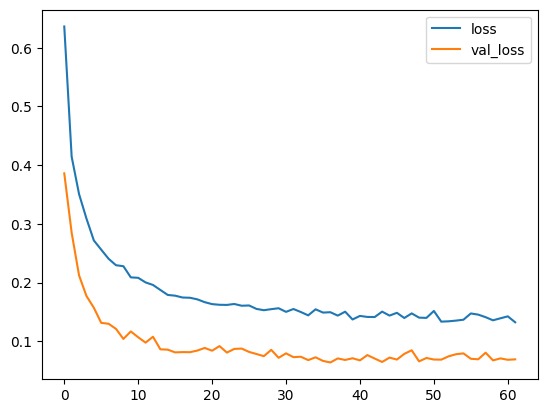

In [96]:
losses.plot()

In [97]:
probs = model.predict(X_test)

620/620 [==============================] - 1s 2ms/step


In [98]:
preds = np.argmax(probs, axis=1)

In [99]:
preds = preds + 1

In [100]:
y_test

array([3, 1, 1, ..., 1, 2, 1])

In [101]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99     14688
           2       0.98      0.93      0.95      1358
           3       1.00      1.00      1.00       724
           4       0.98      0.99      0.98      1614
           5       0.99      0.99      0.99      1451

    accuracy                           0.99     19835
   macro avg       0.99      0.98      0.98     19835
weighted avg       0.99      0.99      0.99     19835



In [102]:
print(confusion_matrix(y_test, preds))

[[14638    21     1    18    10]
 [   84  1257     1    11     5]
 [    1     0   722     1     0]
 [   10     9     0  1592     3]
 [   10     0     0     1  1440]]
